### Carga de datos

In [29]:
import pandas as pd
import os
delitos = os.path.join('..', 'data', 'IDEFC_NM_jun23.csv')
delitos_df=pd.read_csv(delitos, encoding='ISO-8859-1')
edos = os.path.join('..', 'data', 'PoblacionEstado.csv')
edos_df=pd.read_csv(edos)

### Ajuste de tipos de datos y merge

In [30]:
edos_df['Población'] = edos_df['Población'].str.replace(',', '')
edos_df['Población'] = pd.to_numeric(edos_df['Población'], errors='coerce')

In [31]:
import geopandas as gpd
import os

# Ruta a la carpeta que contiene los datos georeferenciados
# Leer el archivo shapefile
mexico_geo_df = gpd.read_file(geo_path)

# Haciendo las sustituciones necesarias en los nombres de los estados
mexico_geo_df['ESTADO'] = mexico_geo_df['ESTADO'].replace({
    'Coahuila': 'Coahuila de Zaragoza',
    'Veracruz': 'Veracruz de Ignacio de la Llave',
    'Distrito Federal': 'Ciudad de México',
    'Michoacán': 'Michoacán de Ocampo'
})

mexico_geo_df

,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
5,MX11,Guanajuato,"POLYGON ((-100.28030 20.20451, -100.34860 20.0..."
6,MX22,Querétaro,"POLYGON ((-100.12280 19.93804, -100.18250 20.0..."
7,MX13,Hidalgo,"POLYGON ((-98.65941 19.58540, -98.65556 19.595..."
8,MX16,Michoacán de Ocampo,"POLYGON ((-103.47960 18.96722, -103.34830 18.9..."
9,MX15,México,"POLYGON ((-98.62798 19.47576, -98.66612 19.405..."


In [32]:
# Agrupando delitos_df por "Entidad", "Año" y "Tipo de delito", sumando los valores mensuales
delitos_df = delitos_df.groupby(['Entidad', 'Año', 'Tipo de delito'])[months_columns].sum().reset_index()

# Mostrando las primeras filas del DataFrame agrupado
delitos_df.head()


,Entidad,Año,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,Aguascalientes,2015,Aborto,0,3,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,Aguascalientes,2015,Abuso de confianza,41,33,31,22,36,43,30.0,40.0,40.0,34.0,43.0,26.0
2,Aguascalientes,2015,Abuso sexual,6,4,0,2,1,1,1.0,1.0,0.0,0.0,1.0,1.0
3,Aguascalientes,2015,Acoso sexual,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aguascalientes,2015,Allanamiento de morada,13,11,18,16,16,19,18.0,19.0,15.0,11.0,4.0,9.0


In [33]:
merged_df = pd.merge(delitos_df, edos_df[['Entidad', 'Población']], on='Entidad', how='left')

months_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

tasa_delitos_final_df = delitos_df[['Entidad', 'Tipo de delito', 'Año']].copy()

# Calculando la tasa de delitos por cada 100 mil habitantes para cada mes
for month in months_columns:
    tasa_delitos_final_df[f'Tasa_{month}'] = (merged_df[month] / merged_df['Población']) * 100000

# Resultado con la tasa de delitos por cada 100 mil habitantes para cada estado, tipo de delito, año y cada mes
tasa_delitos_final_df


,Entidad,Tipo de delito,Año,Tasa_Enero,Tasa_Febrero,Tasa_Marzo,Tasa_Abril,Tasa_Mayo,Tasa_Junio,Tasa_Julio,Tasa_Agosto,Tasa_Septiembre,Tasa_Octubre,Tasa_Noviembre,Tasa_Diciembre
0,Aguascalientes,Aborto,2015,0.000000,0.210437,0.070146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070146,0.000000
1,Aguascalientes,Abuso de confianza,2015,2.875968,2.314803,2.174512,1.543202,2.525240,3.016259,2.104367,2.805822,2.805822,2.384949,3.016259,1.823785
2,Aguascalientes,Abuso sexual,2015,0.420873,0.280582,0.000000,0.140291,0.070146,0.070146,0.070146,0.070146,0.000000,0.000000,0.070146,0.070146
3,Aguascalientes,Acoso sexual,2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Aguascalientes,Allanamiento de morada,2015,0.911892,0.771601,1.262620,1.122329,1.122329,1.332766,1.262620,1.332766,1.052183,0.771601,0.280582,0.631310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,Zacatecas,Tráfico de menores,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11516,Zacatecas,Violación equiparada,2023,0.801411,0.678117,0.678117,0.554823,0.801411,1.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11517,Zacatecas,Violación simple,2023,0.493176,0.801411,1.048000,0.924706,0.801411,1.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11518,Zacatecas,Violencia de género en todas sus modalidades d...,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
final_df = pd.merge(tasa_delitos_final_df, mexico_geo_df, left_on='Entidad', right_on='ESTADO', how='left')

### Filtro 

In [71]:
# Filtrando por delito y año específicos
delito_especifico = "Homicidio"
año_especifico = 2023

filtered_df = final_df.query("`Tipo de delito` == @delito_especifico & `Año` == @año_especifico")

filtered_df


,Entidad,Tipo de delito,Año,Tasa_Enero,Tasa_Febrero,Tasa_Marzo,Tasa_Abril,Tasa_Mayo,Tasa_Junio,Tasa_Julio,Tasa_Agosto,Tasa_Septiembre,Tasa_Octubre,Tasa_Noviembre,Tasa_Diciembre,CODIGO,ESTADO,geometry
338,Aguascalientes,Homicidio,2023,1.543202,1.262620,1.613348,1.262620,1.122329,1.753639,0.0,0.0,0.0,0.0,0.0,0.0,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
698,Baja California,Homicidio,2023,5.571740,4.536988,4.988034,5.837061,6.288107,6.128914,0.0,0.0,0.0,0.0,0.0,0.0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1058,Baja California Sur,Homicidio,2023,1.377674,0.876702,1.252431,1.377674,1.001945,0.876702,0.0,0.0,0.0,0.0,0.0,0.0,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
1418,Campeche,Homicidio,2023,2.369763,0.861732,2.908345,2.154330,2.477479,1.831180,0.0,0.0,0.0,0.0,0.0,0.0,MX04,Campeche,"MULTIPOLYGON (((-91.83446 18.63805, -91.84195 ..."
1778,Chiapas,Homicidio,2023,2.038303,1.605389,2.182607,2.254760,1.966150,1.677541,0.0,0.0,0.0,0.0,0.0,0.0,MX05,Chiapas,"POLYGON ((-91.43750 17.24111, -91.35278 17.176..."
2138,Chihuahua,Homicidio,2023,4.569909,4.436286,4.837155,3.794895,5.585444,4.275938,0.0,0.0,0.0,0.0,0.0,0.0,MX06,Chihuahua,"POLYGON ((-108.47130 26.96133, -108.60420 27.0..."
2498,Ciudad de México,Homicidio,2023,1.172646,1.161788,1.378944,1.302940,1.216077,1.313797,0.0,0.0,0.0,0.0,0.0,0.0,MX09,Ciudad de México,"POLYGON ((-99.28487 19.14244, -99.34056 19.357..."
2858,Coahuila de Zaragoza,Homicidio,2023,1.048694,1.271144,0.985137,0.889801,1.175808,1.271144,0.0,0.0,0.0,0.0,0.0,0.0,MX07,Coahuila de Zaragoza,"POLYGON ((-103.29015 28.99773, -103.28035 28.9..."
3218,Colima,Homicidio,2023,9.980981,7.246466,10.254433,11.211513,12.988948,9.023901,0.0,0.0,0.0,0.0,0.0,0.0,MX08,Colima,"POLYGON ((-103.74548 18.68807, -104.00446 18.8..."
3578,Durango,Homicidio,2023,1.418711,1.145882,1.255013,1.200447,1.746105,1.255013,0.0,0.0,0.0,0.0,0.0,0.0,MX10,Durango,"POLYGON ((-104.31140 22.31921, -104.34500 22.4..."


### Gráfica

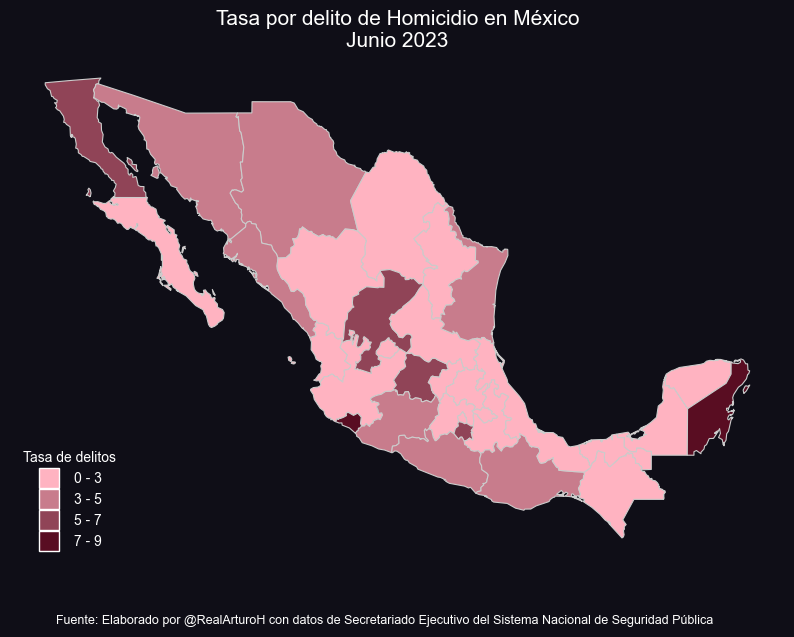

In [75]:
merged_map_data = mexico_shapefile.merge(filtered_df, left_on='ESTADO', right_on='Entidad', how='left')
merged_map_data_geo = gpd.GeoDataFrame(merged_map_data, geometry='geometry_y')

import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

def plot_map_geo(merged_map_data, mes):
    # Obteniendo los datos para el mes seleccionado
    data = merged_map_data[f'Tasa_{mes}']

    # Creando 5 bins usando np.histogram_bin_edges
    bins = np.histogram_bin_edges(data, bins=4)

    # Redondeando los bins a números enteros
    bins = np.round(bins).astype(int)

    # Asignando una categoría basada en los bins
    merged_map_data[f'bins_{mes}'] = np.digitize(data, bins) - 1

    # Creando una paleta de colores con degradado desde blanco hasta rojo
    cmap = LinearSegmentedColormap.from_list('custom', ['#ffb3c1', '#590d22'], N=4)

    fig, ax = plt.subplots(figsize=(10, 8), facecolor='#0f0e17') # Definiendo el tamaño de la figura y el color de fondo
    merged_map_data.plot(column=f'bins_{mes}', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Quitando los ejes y el recuadro
    ax.axis('off')
    ax.set_frame_on(False)

    # Creando una leyenda con cuadrados de colores y rangos automáticos
    legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(i/4), markersize=15) for i in range(4)]
    labels = [f"{bins[i]} - {bins[i + 1]}" for i in range(4)]  # Usando bins enteros

    # Crear la leyenda (sin marco)
    legend = plt.legend(legend_elements, labels, title="Tasa de delitos", loc='lower left', frameon=False)

    # Cambiar el color de los textos dentro de la leyenda
    texts = legend.get_texts()
    for text in texts:
        text.set_color('white')

    # Cambiar el color del título de la leyenda a blanco
    title = legend.get_title()
    title.set_color('white')

    # Eliminar el delineado dentro de los cuadros de los colores
    for line in legend.get_lines():
        line.set_linewidth(0)

    plt.title(f"Tasa por delito de {delito_especifico} en México\n{mes} {año_especifico}", fontsize=15, color='#fffffe')
    plt.figtext(0.5, 0.1, 'Fuente: Elaborado por @RealArturoH con datos de Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública', ha='center', fontsize=9, color='#fffffe')

    plt.show()

# Llamada a la función con el mes deseado
plot_map_geo(merged_map_data_geo, mes='Junio')


### Cambios

In [77]:
# Creando una copia del DataFrame filtrado para evitar SettingWithCopyWarning
comparison_df = filtered_df.copy()

# Supongamos que el mes de interés es 'Abril'
mes_actual = 'Junio'
mes_anterior = 'Mayo'  # Debes determinar esto según tu mes actual

# Creando una nueva columna para la tasa del mes actual
comparison_df['Tasa_mes_actual'] = comparison_df[f'Tasa_{mes_actual}']

# Creando una nueva columna para la tasa del mes anterior
comparison_df['Tasa_mes_anterior'] = comparison_df[f'Tasa_{mes_anterior}']

# Calculando la diferencia entre los meses
comparison_df['Diferencia'] = comparison_df['Tasa_mes_actual'] - comparison_df['Tasa_mes_anterior']

# Determinando si la tasa creció o bajó
comparison_df['Cambio'] = np.where(comparison_df['Diferencia'] > 0, 'Creció', 'Bajó')

# Si la diferencia es 0, podemos asignar 'Sin Cambio'
comparison_df['Cambio'] = np.where(comparison_df['Diferencia'] == 0, 'Sin Cambio', comparison_df['Cambio'])

# Resultado: Nuevo DataFrame con la comparación
comparison_df = comparison_df[['Entidad', 'Tasa_mes_actual', 'Tasa_mes_anterior', 'Diferencia', 'Cambio']]
comparison_df


,Entidad,Tasa_mes_actual,Tasa_mes_anterior,Diferencia,Cambio
338,Aguascalientes,1.753639,1.122329,0.631310,Creció
698,Baja California,6.128914,6.288107,-0.159193,Bajó
1058,Baja California Sur,0.876702,1.001945,-0.125243,Bajó
1418,Campeche,1.831180,2.477479,-0.646299,Bajó
1778,Chiapas,1.677541,1.966150,-0.288609,Bajó
2138,Chihuahua,4.275938,5.585444,-1.309506,Bajó
2498,Ciudad de México,1.313797,1.216077,0.097720,Creció
2858,Coahuila de Zaragoza,1.271144,1.175808,0.095336,Creció
3218,Colima,9.023901,12.988948,-3.965047,Bajó
3578,Durango,1.255013,1.746105,-0.491092,Bajó
